#**STEP 1 : PERKENALAN**

**GRADED CHALLENGE 1**

**BY : MUHAMMAD RIZKI HERFIAN**

**BATCH : 004**

**MATERI : Regression**

**Graded Challenge 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:**

* Mampu memahami konsep regression dengan Linear Regression
* Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
* Mampu mengimplementasikan Linear Regression untuk membuat prediksi 

## **STEP 2 : IMPORTING LIBRARY**

**Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import sklearn
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

**Penjelasan kegunaan masing masing library adalah sebagai berikut :**

* pandas digunakan untuk mengakses dataframe (data loading dan manipulasi dataset)

* numpy digunakan untuk untuk melakukan perhitungan matematis aljabar linear

* matplotlib.pyplot digunakan untuk melakukan visualisasi plotting atas data yg akan diolah


* seaborn digunakan untuk mempercantik visualisasi

* sklearn.model_selection digunakan untuk melakukan proses training model

* sklearn.linear_model (Linear Regression) digunakan untuk melakukan proses pendefinisian model Linear Regression

## **STEP 3 : DATA LOADING**

**Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.**

**Data Set yang digunakan adalah data rideshare dari Uber dan Lyff di kota Boston Massachusetts yang berasal dari kaggle** 

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 1/Graded Challenge/h8dsft_P1W1Reg/rideshare_kaggle.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.shape

(693071, 57)

**Eksplorasi pertama yang dilakukan secara sederhana adalah dengan menjalankan perintah ```.shape```, dan informasi yang didapat adalah, data berisikan 693.071 baris dan 57 kolom. Kemudian untuk melihat isi 5 data pertama, jalankan perintah ```.head```.**

In [5]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


**Kemudian untuk menampilkan semua nama kolom pada dataset dapat dilakukan dengan menjalankan perintah seperti dibawah ini :**

In [6]:
data.columns.values

array(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
       'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperat

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

**Informasi yang didapat dari perintah `.info` adalah, menampilkan semua nama kolom pada data, banyak data baris (entries) dan jenis tipe data pada semua kolom. Untuk Entries, semua harus berjumlah 693071 jika ada yang tidak sesuai dengan prosedur tersebut, maka data memiliki missing values.**

In [8]:
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

**Eksplorasi berikutnya menjalankan perintah `.describe()`. Untuk melihat informasi keseluruhan nilai dataset per kolomnya seperti nilai totalnya, rata-rata, standar defiasi, nilai maksimal minimum dan lain-lain**

In [9]:
data.select_dtypes("object").describe().T

,count,unique,top,freq
id,693071,693071,84b62753-7ce8-4c74-a70c-8cd2281b9cc2,1
datetime,693071,31350,2018-11-27 00:18:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6d318bcc-22a3-4af6-bddd-b409bfce1546,55096
name,693071,13,Black SUV,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


**Masih sama seperti sebelumnya, hanya saja di step ini, sebelum saya mengambil informasi pada perintah `.describe()` saya memisahkan tipe data object dan number kemudian perintah `.T` (Transpose) untuk memudahkan membaca informasi `.describe()`**

In [10]:
data.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


## **STEP 4 : DATA CLEANING**

**Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.**

In [11]:
dtc =  data.copy()

**Membuat variabel baru dan mengcopy dataset yang sudah di load sebelumnya, fungsi dari mengcopy data sebelum diolah adalah untuk menjaga values asli dari dataset tersebut.**

In [12]:
dtc.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [13]:
dtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

**Bisa dilihat jika tipe data kolom datetime masih berupa object padahal isi data pada kolom datetime adalah keterangan waktu, maka perlu dirubah terlebih dahulu dengan menggunakan perintah seperti dibawah ini:**

In [14]:
dtc['datetime'] = pd.to_datetime(dtc['datetime']).dt.normalize()

**Kemudian membuat variabel baru lagi dan setting kolom datetime dan hour set menjadi index**

In [15]:
dtp = dtc.set_index('datetime')
dth = dtc.set_index('hour')

**Untuk melihat lebih jelas mengenai missing value yang terdapat pada semua kolom dataset, bisa menggunakan perintah seperti dibawah ini:**

In [16]:
dth.isnull().sum()

id                                 0
timestamp                          0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
t

**Bisa dilihat, Jika kolom price 55.095 data yang missing values, kemudian dalam menangani missing values kali ini, saya akan mengisi nilai NAN pada kolom price dengan nilai 0, perintahnya sebagai berikut :**

In [17]:
dth['price'].fillna(0, inplace =True)

**Kemudian cek kembali lagi apakah semuanya sudah 0.**

In [18]:
dth.isnull().sum()

id                             0
timestamp                      0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

##**STEP 5 : EKSPLORASI DATA**

**Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.**

**Data distribution dari Price**

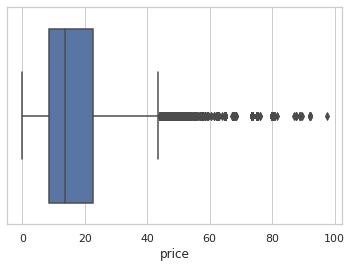

In [19]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=dth["price"])

**Data Grouping, membuat kelompok kolom data yang memiliki tipe data Number**

In [20]:
num_col=dth.select_dtypes(include='number')

**Menampilkan 45 kolom data yang memiliki tipe data number (Integer/Float/etc)**

In [21]:
num_col.shape

(693071, 45)

In [22]:
num_col.head()

,timestamp,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,1.544953e+09,16,12,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
2,1.543284e+09,27,11,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
1,1.543367e+09,28,11,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
4,1.543554e+09,30,11,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
3,1.543463e+09,29,11,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


**Sama seperti Grouping sebelumnya, kali ini membuat kelompok kolom data yang memiliki tipe data object**

In [23]:
cat_col=dth.select_dtypes(include=['object'])

**Menampilkan 10 kolom data yang memiliki tipe data object**

In [24]:
cat_col.shape

(693071, 10)

In [25]:
cat_col.head()

,id,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
hour,,,,,,,,,,
9,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
2,4bd23055-6827-41c6-b23b-3c491f24e74d,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
1,981a3613-77af-4620-a42a-0c0866077d1e,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
4,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
3,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


##**STEP 6 : DATA PREPROCESSING**

**Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.**

In [26]:
dtc.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000808,0.003553,0.000572,0.168130,-0.136802,-0.248748,-0.226264,-0.179958,-0.147596,-0.168024,-0.066171,0.005706,0.998842,0.158993,-0.228125,0.999332,-0.366859,0.999175,-0.215363,0.999313,-0.401999,0.999203,-0.265444,0.533025,-0.133526,-0.081699,-0.025708,0.158993,0.196518,0.999372,0.999372,-0.846203,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276
hour,-0.028004,1.000000,0.066090,-0.079379,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,0.198190,-0.233349,-0.129725,-0.275762,0.072778,0.077308,-0.028047,0.174129,0.005172,-0.027838,0.015326,-0.026797,0.005513,-0.027997,0.016005,-0.026970,0.004839,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,-0.341292,0.066090,1.000000,-0.861306,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,-0.223545,0.091664,0.030903,-0.093340,0.440502,0.402637,-0.336417,0.104992,-0.283561,-0.343118,-0.088320,-0.333558,-0.398183,-0.343291,-0.192984,-0.335504,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,0.771182,-0.079379,-0.861306,1.000000,0.000913,0.002298,-0.000628,0.085791,-0.126912,-0.081774,0.024983,-0.154531,-0.098031,-0.022256,-0.334803,-0.270494,0.767265,0.011493,0.068313,0.772053,-0.138732,0.765489,0.152651,0.772163,-0.086998,0.766822,-0.074794,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003553,0.002280,-0.000627,0.002298,0.345061,1.000000,0.024769,0.000819,-0.000293,-0.002884,-0.003116,-0.000256,0.000371,-0.003901,0.002277,0.001364,0.003618,0.004092,-0.004154,0.003604,-0.002146,0.003556,-0.004098,0.003585,-0.001501,0.003583,-0.004078,0.003490,-0.002146,-0.000905,0.002318,0.004092,0.001467,0.003556,0.003556,-0.004594,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,0.000572,-0.000077,0.001389,-0.000628,0.240458,0.024769,1.000000,0.001375,-0.001829,-0.001572,-0.002532,-0.001530,-0.002769,-0.001676,0.002511,0.002093,0.000439,0.001714,-0.001897,0.000520,-0.002601,0.000573,-0.002041,0.000520,-0.002994,0.000551,-0.001849,-0.003003,0.002167,-0.002103,-0.002422,0.001714,0.003324,0.000544,0.000544,-0.000150,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.168130,0.019493,0.006838,0.085791,0.002088,0.000819,0.001375,1.000000,-0.531259,-0.098604,-0.067098,-0.074181,-0.071275,-0.117481,-0.097139,0.024309,0.172625,0.124166,-0.115307,0.173702,-0.032133,0.171193,-0.092167,0

In [27]:
dtc=pd.get_dummies(dtc,columns=['destination'],drop_first=False)
dtc=pd.get_dummies(dtc,columns=['icon'],drop_first=False)
dtc=pd.get_dummies(dtc,columns=['name'],drop_first=False)
dtc=pd.get_dummies(dtc,columns=['product_id'],drop_first=False)

**pd.get_dummies digunakan untuk manipulasi data. Ini mengubah data kategoris menjadi dummy atau variabel indikator. Kemudian cek kembali lagi .corr Hanya untuk cek korelasi mana yang besar yang nantinya akan dipasang menjadi kolom.**

In [28]:
dtc.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000808,0.003553,0.000572,0.168130,-0.136802,-0.248748,-0.226264,-0.179958,-0.147596,-0.168024,-0.066171,0.005706,0.998842,0.158993,-0.228125,0.999332,-0.366859,0.999175,-0.215363,0.999313,-0.401999,0.999203,-0.265444,0.533025,-0.133526,-0.081699,-0.025708,0.158993,0.196518,0.999372,0.999372,-0.846203,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276,-0.000971,-0.000399,-0.000246,0.003024,0.003160,-0.001344,0.001132,-0.001529,-0.002255,-0.000135,0.000645,-0.001119,0.091179,0.012448,0.115698,-0.075200,-0.015965,-0.022989,-0.141782,-0.000314,-0.000099,-0.001467,0.000340,-0.000036,-0.001249,0.000077,0.000713,0.000318,0.000709,0.001858,-0.000895,-0.000008,0.001858,-0.000314,-0.000099,-0.000895,0.000318,0.000709,-0.000008,-0.001249,0.000713,0.000340,-0.000036,0.000077,-0.001467
hour,-0.028004,1.000000,0.066090,-0.079379,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,0.198190,-0.233349,-0.129725,-0.275762,0.072778,0.077308,-0.028047,0.174129,0.005172,-0.027838,0.015326,-0.026797,0.005513,-0.027997,0.016005,-0.026970,0.004839,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785,0.002382,0.002347,0.000793,0.000083,-0.000790,0.001030,-0.000059,0.000441,0.001974,-0.006042,-0.001025,-0.001122,0.110412,-0.264277,0.095141,-0.062470,0.292185,-0.129306,-0.107706,-0.001263,-0.000429,0.000240,0.000553,0.000082,0.002343,-0.000381,-0.000449,0.000298,0.000095,-0.001534,0.000022,0.000503,-0.001534,-0.001263,-0.000429,0.000022,0.000298,0.000095,0.000503,0.002343,-0.000449,0.000553,0.000082,-0.000381,0.000240
day,-0.341292,0.066090,1.000000,-0.861306,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,-0.223545,0.091664,0.030903,-0.093340,0.440502,0.402637,-0.336417,0.104992,-0.283561,-0.343118,-0.088320,-0.333558,-0.398183,-0.343291,-0.192984,-0.335504,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411,0.003734,0.000907,-0.001347,-0.003951,0.000800,-0.001195,0.003255,0.002734,-0.002406,-0.001

In [29]:
dth = dth[["price", 'sunsetTime', 'sunriseTime', "name", "icon", 
                 "destination", "distance", "surge_multiplier", "short_summary", 
                 "source", "windSpeed", "windGust", 'temperature','product_id']]

In [30]:
dth.head()

,price,sunsetTime,sunriseTime,name,icon,destination,distance,surge_multiplier,short_summary,source,windSpeed,windGust,temperature,product_id
hour,,,,,,,,,,,,,,
9,5.0,1544994864,1544962084,Shared,partly-cloudy-night,North Station,0.44,1.0,Mostly Cloudy,Haymarket Square,8.66,9.17,42.34,lyft_line
2,11.0,1543266992,1543232969,Lux,rain,North Station,0.44,1.0,Rain,Haymarket Square,11.98,11.98,43.58,lyft_premier
1,7.0,1543353364,1543319437,Lyft,clear-night,North Station,0.44,1.0,Clear,Haymarket Square,7.33,7.33,38.33,lyft
4,26.0,1543526114,1543492370,Lux Black XL,clear-night,North Station,0.44,1.0,Clear,Haymarket Square,5.28,5.28,34.38,lyft_luxsuv
3,9.0,1543439738,1543405904,Lyft XL,partly-cloudy-night,North Station,0.44,1.0,Partly Cloudy,Haymarket Square,9.14,9.14,37.44,lyft_plus


##**STEP 7 : PENDEFINISIAN MODEL**

**Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.**

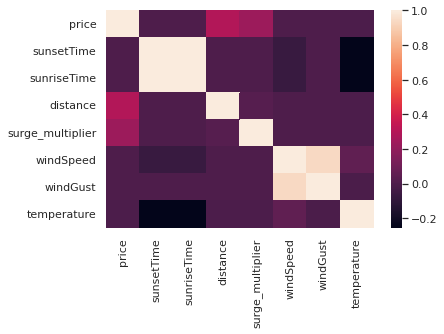

In [31]:
sns.heatmap(dth.corr())

**Pembentukan data Dummies**

In [32]:
dth=pd.get_dummies(dth,columns=['short_summary'],drop_first=False)
dth=pd.get_dummies(dth,columns=['destination'],drop_first=False)
dth=pd.get_dummies(dth,columns=['source'],drop_first=False)
dth=pd.get_dummies(dth,columns=['icon'],drop_first=False)
dth=pd.get_dummies(dth,columns=['product_id'],drop_first=False)
dth=pd.get_dummies(dth,columns=['name'],drop_first=False)

In [33]:
dth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693071 entries, 9 to 23
Data columns (total 74 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   price                                            693071 non-null  float64
 1   sunsetTime                                       693071 non-null  int64  
 2   sunriseTime                                      693071 non-null  int64  
 3   distance                                         693071 non-null  float64
 4   surge_multiplier                                 693071 non-null  float64
 5   windSpeed                                        693071 non-null  float64
 6   windGust                                         693071 non-null  float64
 7   temperature                                      693071 non-null  float64
 8   short_summary_ Clear                             693071 non-null  uint8  
 9   short_summary_ Driz

In [34]:
dth = dth.apply(pd.to_numeric)

In [35]:
dth.dropna(axis=0, how='any', inplace=True)

**Pendefinisian data yang akan digunakan untuk feeding**

In [36]:
x = dth.drop(columns='price')
y = dth['price']

##**STEP 8 : PELATIHAN MODEL**

**Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.**

In [37]:
x

,sunsetTime,sunriseTime,distance,surge_multiplier,windSpeed,windGust,temperature,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,1544994864,1544962084,0.44,1.0,8.66,9.17,42.34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1543266992,1543232969,0.44,1.0,11.98,11.98,43.58,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1543353364,1543319437,0.44,1.0,7.33,7.33,38.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1543526114,1543492370,0.44,1.0,5.28,5.28,34.38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1543439738,1543405904,0.44,1.0,9.14,9.14,37.44,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1543698855,1543665331,1.00,1.0,2.34,2.87,37.05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
23,1543698855,1543665331,1.00,1.0,2.34,2.87,37.05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23,1543698855,1543665331,1.00,1.0,2.34,2.87,37.05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [38]:
y

hour
9      5.0
2     11.0
1      7.0
4     26.0
3      9.0
      ... 
23    13.0
23     9.5
23     0.0
23    27.0
23    10.0
Name: price, Length: 693071, dtype: float64

**Splitting**

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

In [40]:
print(x_train.shape)
print(y_train.shape)

(554456, 73)
(554456,)


In [41]:
print(x_test.shape)
print(y_test.shape)

(138615, 73)
(138615,)


**Pendefinisian model dan Train the Model**

In [42]:
model = LinearRegression(fit_intercept=False)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [43]:
y_pred = model.predict(x_test)

## **STEP 9 : EVALUASI MODEL**

**Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.**

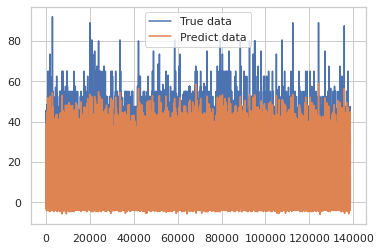

In [44]:
fig,ax = plt.subplots()

plt.rcParams['agg.path.chunksize'] = 10000
y_test_reset = y_test.reset_index(drop=True)

ax.plot(y_test_reset.index.values, y_test, label='True data')
ax.plot(y_test_reset.index.values, y_pred, label='Predict data')
plt.legend()

In [45]:
diff1 = y_test - y_pred
error1 = np.sqrt(np.mean(np.power(diff1,2)))
print('Error setelah diprediksi: %.3f' %error1)

Error setelah diprediksi: 2.546


In [46]:
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.2f' %mse)

MSE: 6.48


In [47]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: %.3f' %mae)

Mean Absolute Error: 1.796


In [48]:
params = pd.Series(model.coef_, index=x_test.columns)
pd.set_option('display.max_rows', None)

In [49]:
from sklearn.utils import resample
import numpy as np
np.random.seed(1)
err = np.std([model.fit(*resample(x_test, y_test)).coef_
              for i in range(100)], 0)

In [50]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))
pd.set_option('display.max_rows', None)

                                                 effect  error
sunsetTime                                         -0.0    0.0
sunriseTime                                         0.0    0.0
distance                                            3.0    0.0
surge_multiplier                                   19.0    0.0
windSpeed                                          -0.0    0.0
windGust                                            0.0    0.0
temperature                                         0.0    0.0
short_summary_ Clear                                7.0   50.0
short_summary_ Drizzle                              2.0   15.0
short_summary_ Foggy                                5.0   37.0
short_summary_ Light Rain                           2.0   15.0
short_summary_ Mostly Cloudy                        5.0   37.0
short_summary_ Overcast                             5.0   37.0
short_summary_ Partly Cloudy                        5.0   37.0
short_summary_ Possible Drizzle                     2.0

##**STEP 10 : MODEL INFERENCE**

**Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.**

In [51]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=2/9, random_state=77)

In [52]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
def z_scoring(arrays):
    arr_mean = arrays.mean()
    arr_std = arrays.std()
    arr_rst = (arrays-arr_mean)/arr_std
    return arr_rst,arr_mean,arr_std

def restore_z_score(arrays,arr_mean,arr_std):
    return arrays*arr_std+arr_mean

In [55]:
x_train_trf = scaler.transform(x_train) 
y_train_trf,y_mean,y_std = z_scoring(y_train)

In [56]:
model = LinearRegression(fit_intercept=False)
model.fit(x_train_trf, y_train_trf)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [57]:
LinearRegression(fit_intercept=False)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [58]:
x_val_trf = scaler.transform(x_val)

In [59]:
model_pred = model.predict(x_val_trf)
prediction = restore_z_score(model_pred,y_mean,y_std)

In [60]:
difference = y_val - prediction

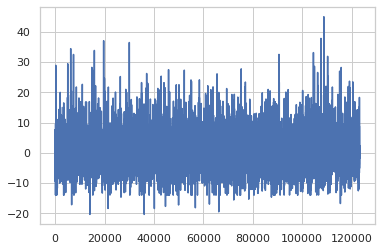

In [61]:
difference.reset_index(drop=True).plot()

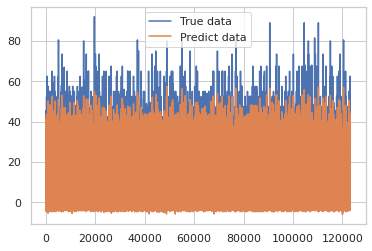

In [62]:
fig,ax = plt.subplots()

plt.rcParams['agg.path.chunksize'] = 10000
y_val_reset = y_val.reset_index(drop=True)

ax.plot(y_val_reset.index.values, y_val, label='True data')
ax.plot(y_val_reset.index.values, prediction, label='Predict data')
plt.legend()

In [63]:
diff2 = y_val - prediction
error2 = np.sqrt(np.mean(np.power(diff2,2)))
print('Error setelah diprediksi: %.3f' %error2)

Error setelah diprediksi: 2.561


In [64]:
mse = mean_squared_error(y_val, prediction)
print('Mean Squared Error: %.2f' %mse)

Mean Squared Error: 6.56


In [65]:
mae = mean_absolute_error(y_val, prediction)
print('Mean Absolute Error: %.3f' %mae)

Mean Absolute Error: 1.796


##**STEP 11: PENGAMBILAN KESIMPULAN**

**Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.**

##**Overall Analysis :**

Evaluasi model menghasilkan nilai :
* MSE: 6.48
* Mean Absolute Error: 1.796
* Error setelah diprediksi: 2.546

Model Inference
* Mean Squared Error: 6.56
* Mean Absolute Error: 1.796
* Error setelah diprediksi: 2.561

Kedua pengujian tersebut memiliki hasil yang tidak jauh berbeda, dari segi nilai MSE, MAE untuk linier regresi tetap mendapatkan keakuratan dan error yang tidak jauh berbeda bisa dilihat dari nilai error setelah di prediksi.

##**Model Analysis :**
Hasil dari predict data mendekati true data,ini menunjukkan bahwa model Linear Regression yang telah dibuat cocok digunakan pada dataset ini.

